# Change in PNA metrics from T2 to T1

## Executive summary

This document provides a full documentation of the impact in PNA metrics due to the migration from T2 to T1 data products.

To main changes have occured: (i) To be a replacement, or removal; now we compare the eventual change in external id, not product id. (ii) We do not impose that the replacements, removals happen in the same day. As there are some orders that are processed in the midnight, and some products are created in D-1 and others in Do

With this in mind, we expected the following metrics to change:

    At product level:
        - wm feedback no change
        - replacements --> increase
        - removals --> increase
    
    At an order level:
        - cancellations --> no change
        - refunds --> no change
        - wm feedback --> no change
        - replacements --> increase
        - removals --> increase

**Business questions answered:**

- **Is there a relevant change in PNA?** --> No. 

    At a product level: We are looking the data at a bought_product_id level:
    
        - bought product is pna --> up by <0.1%
        - bought product is partial removal --> up by approx 0.01%
        - bought product is total removal --> up by 0.1%
        - bought proudct is replacemetns --> up by <0.01%

At an order level, there is no relevant change

## Plan

Business question to answer
- [X] Is there any relevant change in PNA?

Tasks
- [X] Gather data to compare distinct types of PNA

Conclusions
- [X] Prepare message to share with business
- [ ] Anything to add to knowledge
- [ ] Any query to add to repo

## Config

In [29]:
import matplotlib.pyplot as  plt
import pandas as pd
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repository')

from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines

dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## Task 1: Gather data to compare met_data from the datasets

In [98]:
#Products
p1 = query_engines.QueryEngines(
    query='pna_products_old.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

p2 = query_engines.QueryEngines(
    query='pna_products_new.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

p3 = query_engines.QueryEngines(
    query='bought_products.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

po = p1.query_run_starbust()
pn = p2.query_run_starbust()
bp = p3.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/770e1fa2fd7b2e77dff5b16f35b2ba2fb3a3292ea3beed6afca64158036692b1


c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/cd687d436727ebd06e4588f894430ea8aab99d8921d291be582a685adef37f80


c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/22ae586ff183d24e3d3572478ab625b71d6abf98c56b19a2c79470b3f0aedf83


In [104]:
po['month'] = pd.to_datetime(po['month'])
pn['month'] = pd.to_datetime(pn['month'])

In [110]:
#month to datetime
po['month'] = pd.to_datetime(po['month'])
pn['month'] = pd.to_datetime(pn['month'])

#exclude current month
cond = po['month'] != pd.to_datetime('2024-02-01')
po = po[cond]
cond = pn['month'] != pd.to_datetime('2024-02-01')
pn = pn[cond]

#percentages
po['perc_partial_removal'] = po['bought_product_id_is_pna_partial_removal']/po['total_bought_products']
po['perc_total_removal'] = po['bought_product_id_is_pna_total_removal']/po['total_bought_products']
po['perc_replacement'] = po['bought_product_id_is_pna_replacement']/po['total_bought_products']
po['perc_wm_feedback'] = po['bought_product_id_is_wm_feedback']/po['total_bought_products']
po['perc_pna'] = po['bought_product_id_is_pna']/po['total_bought_products']

pn['perc_partial_removal'] = pn['bought_product_id_is_pna_partial_removal']/pn['total_bought_products']
pn['perc_total_removal'] = pn['bought_product_id_is_pna_total_removal']/pn['total_bought_products']
pn['perc_replacement'] = pn['bought_product_id_is_pna_replacement']/pn['total_bought_products']
pn['perc_wm_feedback'] = pn['bought_product_id_is_wm_feedback']/pn['total_bought_products']
pn['perc_pna'] = pn['bought_product_id_is_pna']/pn['total_bought_products']

Text(0.5, 1.0, 'Total products')

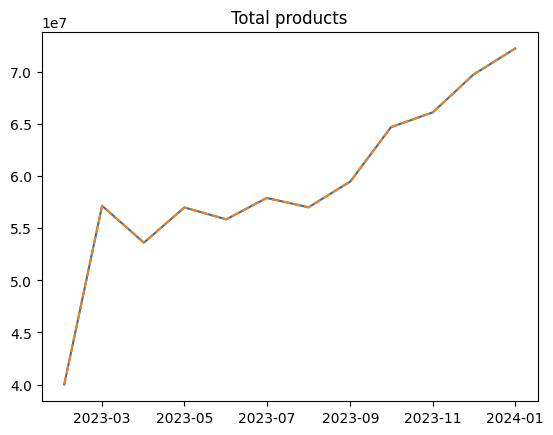

In [111]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['total_bought_products'])
plt.plot(pn['month'], pn['total_bought_products'], linestyle='--')

plt.title('Total products')

Text(0.5, 1.0, 'Products with pna')

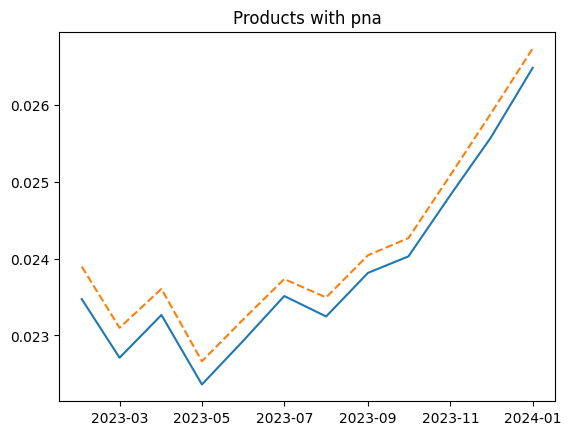

In [112]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['perc_pna'])
plt.plot(pn['month'], pn['perc_pna'], linestyle='--')

plt.title('Products with pna')

Text(0.5, 1.0, 'Products with partial removal')

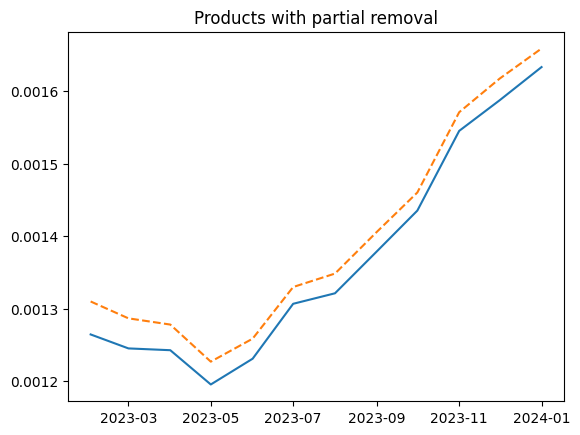

In [113]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['perc_partial_removal'])
plt.plot(pn['month'], pn['perc_partial_removal'], linestyle='--')

plt.title('Products with partial removal')

Text(0.5, 1.0, 'Products with total removal')

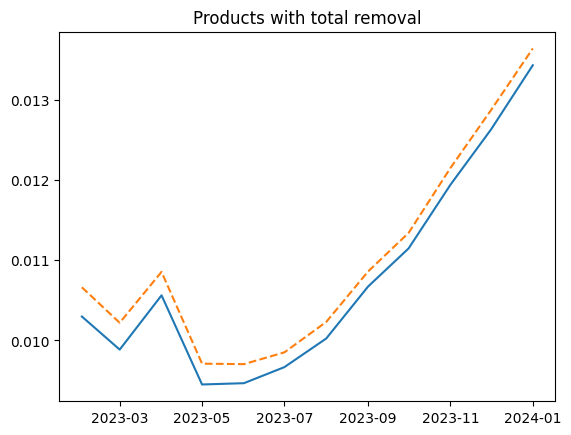

In [114]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['perc_total_removal'])
plt.plot(pn['month'], pn['perc_total_removal'], linestyle='--')

plt.title('Products with total removal')

Text(0.5, 1.0, 'Products with replacement')

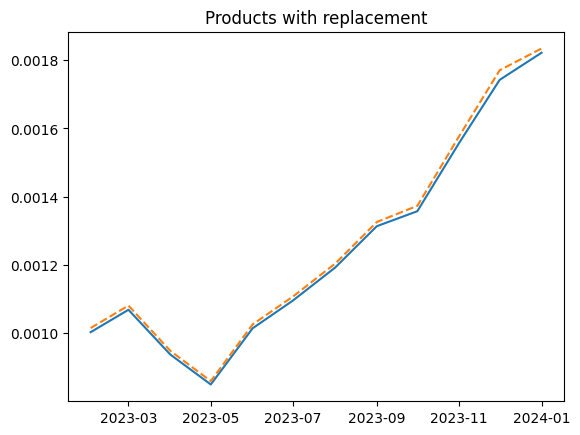

In [115]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['perc_replacement'])
plt.plot(pn['month'], pn['perc_replacement'], linestyle='--')

plt.title('Products with replacement')

Text(0.5, 1.0, 'Products wm feedback')

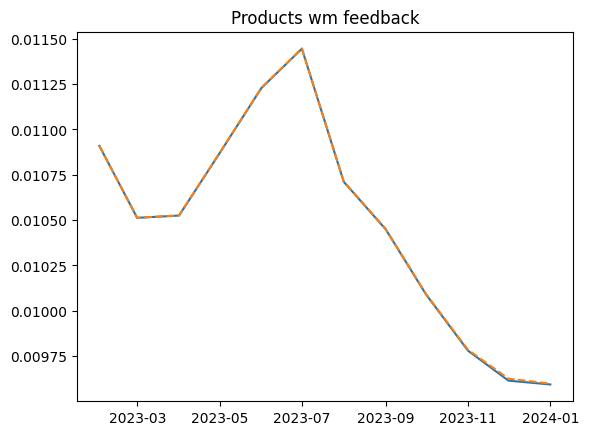

In [117]:
po.sort_values(by='month', inplace=True)
pn.sort_values(by='month', inplace=True)


plt.plot(po['month'], po['perc_wm_feedback'])
plt.plot(pn['month'], pn['perc_wm_feedback'], linestyle='--')

plt.title('Products wm feedback')

In [24]:
#Orders
o1 = query_engines.QueryEngines(
    query='pna_orders_old.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

o2 = query_engines.QueryEngines(
    query='pna_orders_new.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

o3 = query_engines.QueryEngines(
    query='order_descriptors.sql', 
    params=None,
    load_from_output_file=None, #with no .csv
    output_file=None, #with no .csv
    printq=None
)

oo = o1.query_run_starbust()
on = o2.query_run_starbust()
od = o3.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/8cf9a1c6f9cd8149f27f21f6b2b5d41cfbaa04fb4e6a5bdc4c8a450579ea9774


c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/56672ffdf785a7213664da00e5d946c24cc13ddbb454226c4f8c7324e1163f29


c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/53cd9fa175a2d4265eb5efcc76fc96c5268db2d41227661a71c8930c6d2cafd1


Text(0.5, 1.0, 'Total orders')

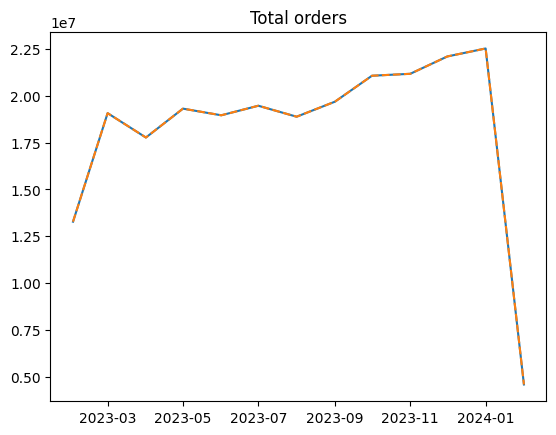

In [54]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['total_orders'])
plt.plot(on['month'], on['total_orders'], linestyle='--')

plt.title('Total orders')

Text(0.5, 1.0, 'Order is pna')

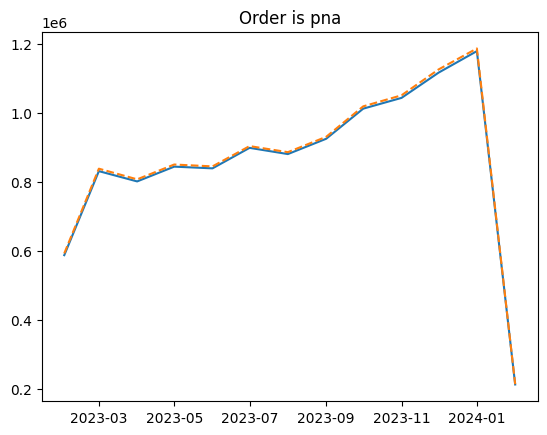

In [53]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna'])
plt.plot(on['month'], on['order_is_pna'], linestyle='--')

plt.title('Order is pna')

Text(0.5, 1.0, 'Order is replacement')

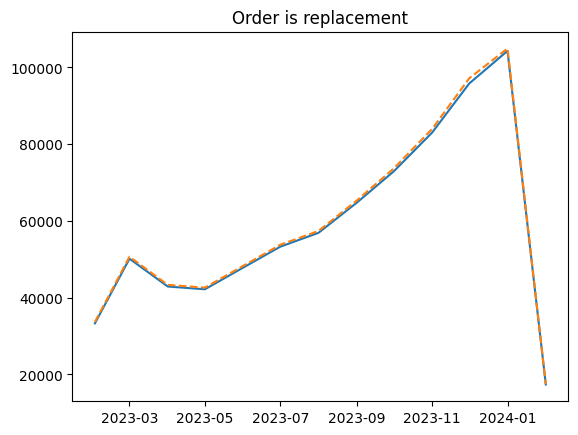

In [52]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_replacement'])
plt.plot(on['month'], on['order_is_pna_replacement'], linestyle='--')

plt.title('Order is replacement')

Text(0.5, 1.0, 'Order is partial removal')

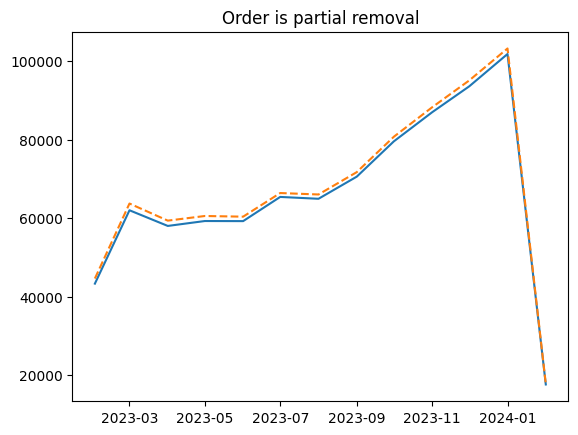

In [51]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_partial_removal'])
plt.plot(on['month'], on['order_is_pna_partial_removal'], linestyle='--')

plt.title('Order is partial removal')

Text(0.5, 1.0, 'Order is total removal')

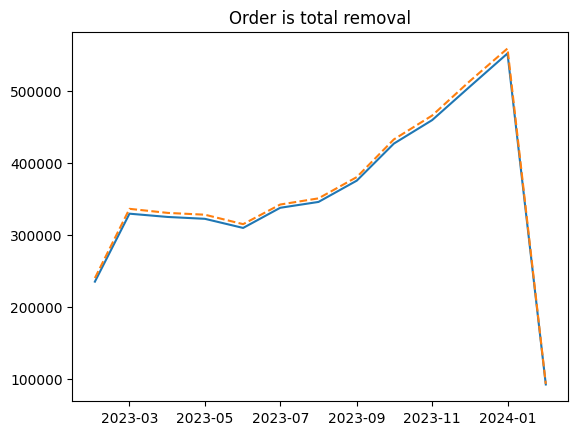

In [50]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_total_removal'])
plt.plot(on['month'], on['order_is_pna_total_removal'], linestyle='--')

plt.title('Order is total removal')

Text(0.5, 1.0, 'Order is wm feedback')

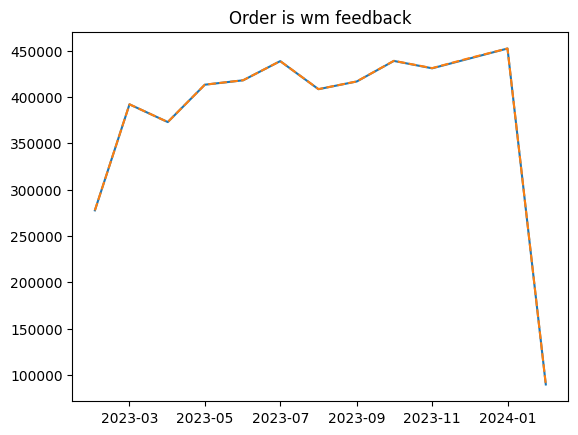

In [56]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_wm_feedback'])
plt.plot(on['month'], on['order_is_pna_wm_feedback'], linestyle='--')

plt.title('Order is wm feedback')

Text(0.5, 1.0, 'Order is refund')

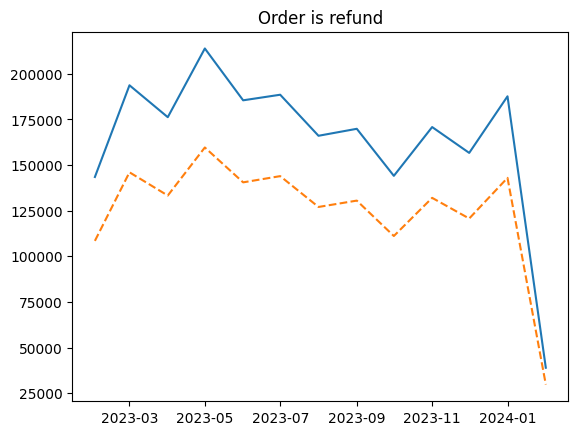

In [58]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_refund'])
plt.plot(on['month'], on['order_is_pna_refund'], linestyle='--')

plt.title('Order is refund')

Text(0.5, 1.0, 'Order is cx')

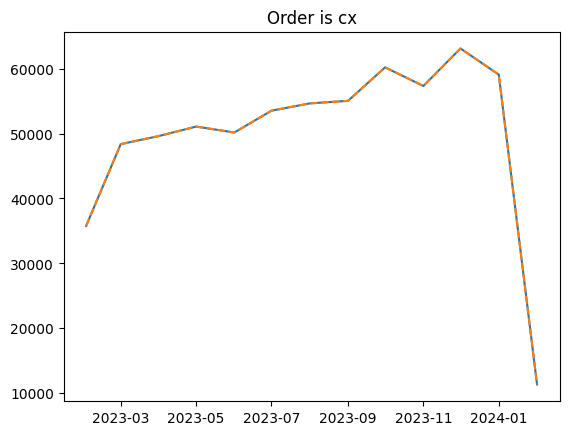

In [59]:
oo.sort_values(by='month', inplace=True)
on.sort_values(by='month', inplace=True)


plt.plot(oo['month'], oo['order_is_pna_cancellation'])
plt.plot(on['month'], on['order_is_pna_cancellation'], linestyle='--')

plt.title('Order is cx')

In [55]:
oo.columns

Index(['month', 'total_orders', 'order_is_pna', 'order_is_pna_replacement',
       'order_is_pna_partial_removal', 'order_is_pna_total_removal',
       'order_is_pna_wm_feedback', 'order_is_pna_refund',
       'order_is_pna_cancellation'],
      dtype='object')